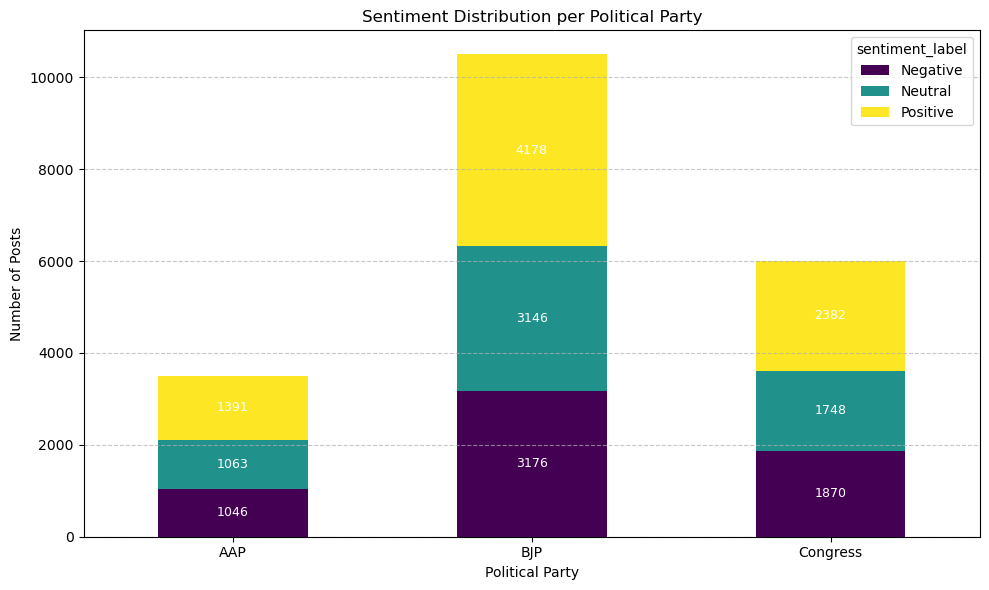

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

sentiment_counts = df.groupby(['party', 'sentiment_label']).size().reset_index(name='count')
pivot_df = sentiment_counts.pivot(index='party', columns='sentiment_label', values='count').fillna(0)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Sentiment Distribution per Political Party")
plt.xlabel("Political Party")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white')

plt.savefig("sentiment_per_party_labeled.png")
plt.show()


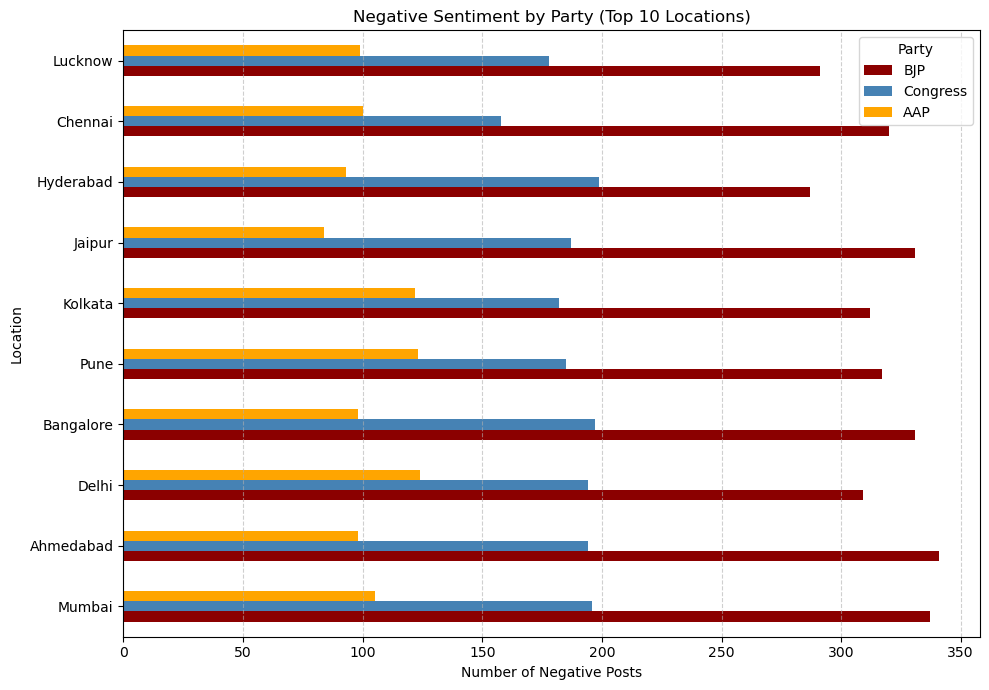

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

df_neg = df[df['sentiment_label'] == 'Negative']

grouped = df_neg.groupby(['location', 'party']).size().unstack(fill_value=0)

grouped['Total'] = grouped.sum(axis=1)
top10 = grouped.sort_values(by='Total', ascending=False).head(10).drop(columns='Total')

custom_colors = {
    'BJP': '#8B0000',      
    'Congress': '#4682B4',
    'AAP': '#FFA500'        
}

top10 = top10[custom_colors.keys()]

top10.plot(
    kind='barh',
    figsize=(10, 7),
    color=[custom_colors[col] for col in top10.columns]
)

plt.title("Negative Sentiment by Party (Top 10 Locations)")
plt.xlabel("Number of Negative Posts")
plt.ylabel("Location")
plt.legend(title='Party')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


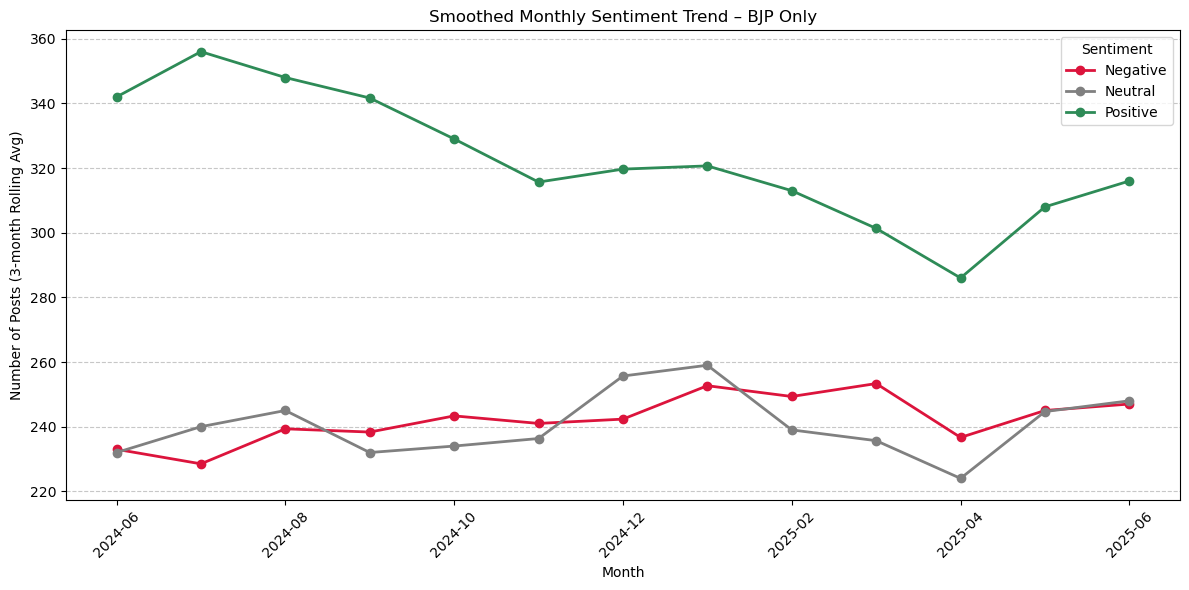

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

df_bjp = df[df['party'] == 'BJP'].copy()

df_bjp['timestamp'] = pd.to_datetime(df_bjp['timestamp'])

df_bjp['month'] = df_bjp['timestamp'].dt.to_period('M').astype(str)

monthly_sentiment = df_bjp.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

monthly_sentiment = monthly_sentiment.sort_index()

smoothed = monthly_sentiment.rolling(window=3, min_periods=1).mean()

custom_colors = {
    'Positive': '#2E8B57',  
    'Neutral': '#808080',   
    'Negative': '#DC143C'   
}

smoothed.plot(
    kind='line',
    marker='o',
    linewidth=2,
    figsize=(12, 6),
    color=[custom_colors[col] for col in smoothed.columns]
)

plt.title("Smoothed Monthly Sentiment Trend – BJP Only")
plt.xlabel("Month")
plt.ylabel("Number of Posts (3-month Rolling Avg)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


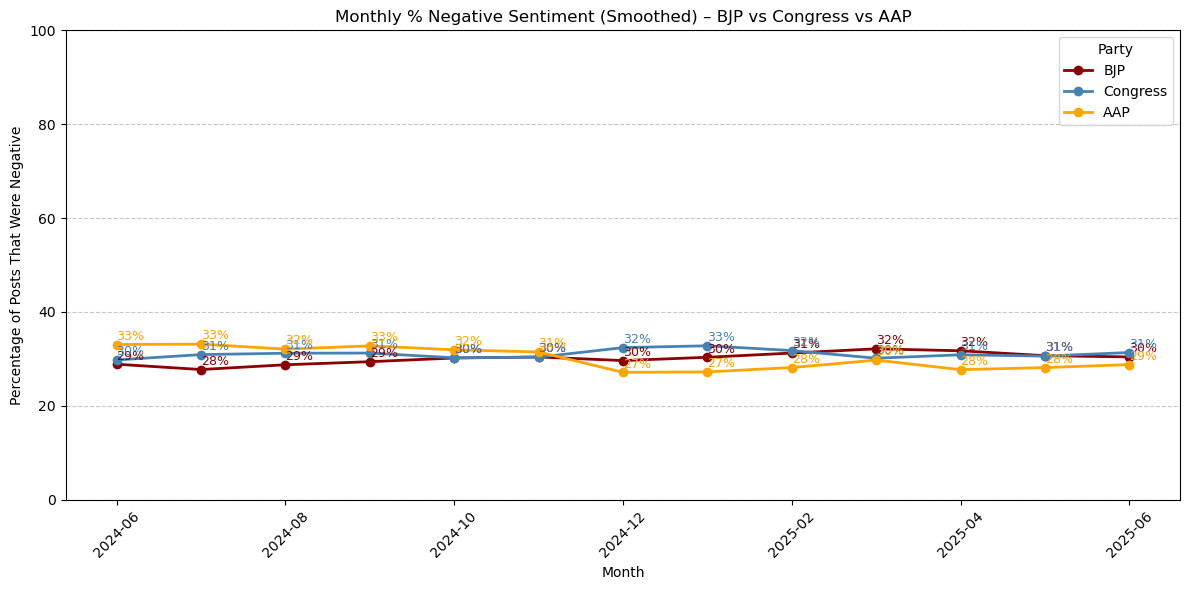

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

monthly_total = df.groupby(['month', 'party']).size().unstack(fill_value=0)

df_neg = df[df['sentiment_label'] == 'Negative'].copy()
monthly_negative = df_neg.groupby(['month', 'party']).size().unstack(fill_value=0)

monthly_percentage = (monthly_negative / monthly_total * 100).fillna(0)
monthly_percentage = monthly_percentage.sort_index()

smoothed = monthly_percentage.rolling(window=3, min_periods=1).mean()

party_colors = {
    'BJP': '#8B0000',
    'Congress': '#4682B4',
    'AAP': '#FFA500'
}
smoothed = smoothed[party_colors.keys()]

fig, ax = plt.subplots(figsize=(12, 6))
lines = smoothed.plot(ax=ax, kind='line', marker='o', linewidth=2,
                      color=[party_colors[col] for col in smoothed.columns])

for party in smoothed.columns:
    for x, y in enumerate(smoothed[party]):
        label = f"{y:.0f}%" if y > 0 else ""
        ax.annotate(label, (x, y + 1), fontsize=9, color=party_colors[party])

plt.title("Monthly % Negative Sentiment (Smoothed) – BJP vs Congress vs AAP")
plt.xlabel("Month")
plt.ylabel("Percentage of Posts That Were Negative")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


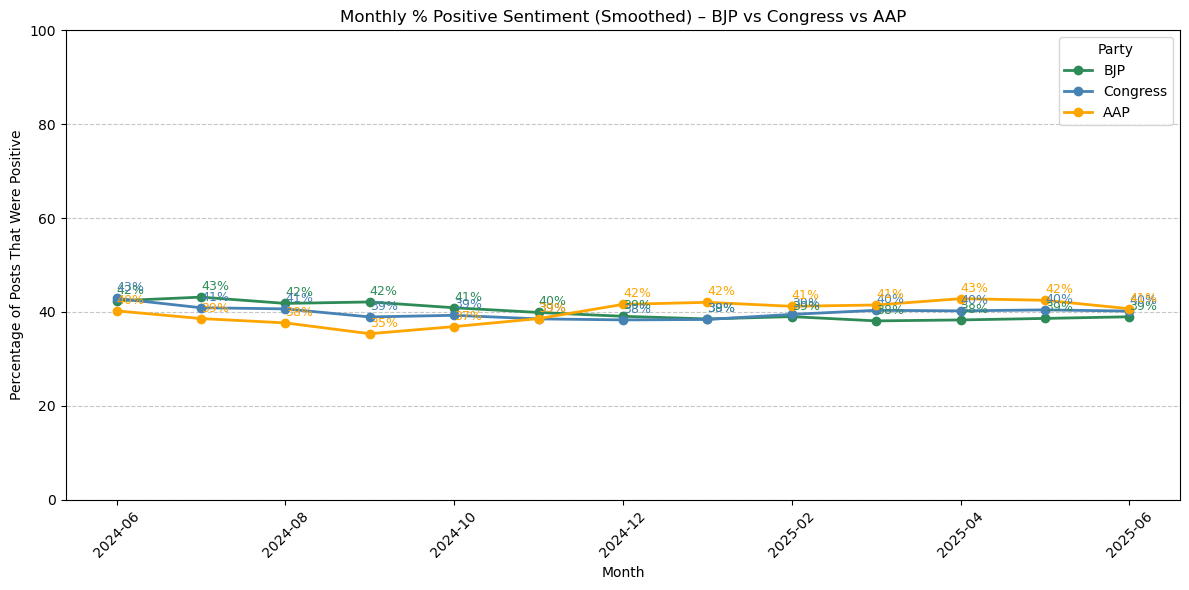

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

monthly_total = df.groupby(['month', 'party']).size().unstack(fill_value=0)

df_pos = df[df['sentiment_label'] == 'Positive'].copy()
monthly_positive = df_pos.groupby(['month', 'party']).size().unstack(fill_value=0)

monthly_percentage_pos = (monthly_positive / monthly_total * 100).fillna(0)
monthly_percentage_pos = monthly_percentage_pos.sort_index()

smoothed_pos = monthly_percentage_pos.rolling(window=3, min_periods=1).mean()

party_colors = {
    'BJP': '#2E8B57',       
    'Congress': '#4682B4',  
    'AAP': '#FFA500'       
}
smoothed_pos = smoothed_pos[party_colors.keys()]

fig, ax = plt.subplots(figsize=(12, 6))
lines = smoothed_pos.plot(ax=ax, kind='line', marker='o', linewidth=2,
                          color=[party_colors[col] for col in smoothed_pos.columns])

for party in smoothed_pos.columns:
    for x, y in enumerate(smoothed_pos[party]):
        label = f"{y:.0f}%" if y > 0 else ""
        ax.annotate(label, (x, y + 1.5), fontsize=9, color=party_colors[party])


plt.title("Monthly % Positive Sentiment (Smoothed) – BJP vs Congress vs AAP")
plt.xlabel("Month")
plt.ylabel("Percentage of Posts That Were Positive")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


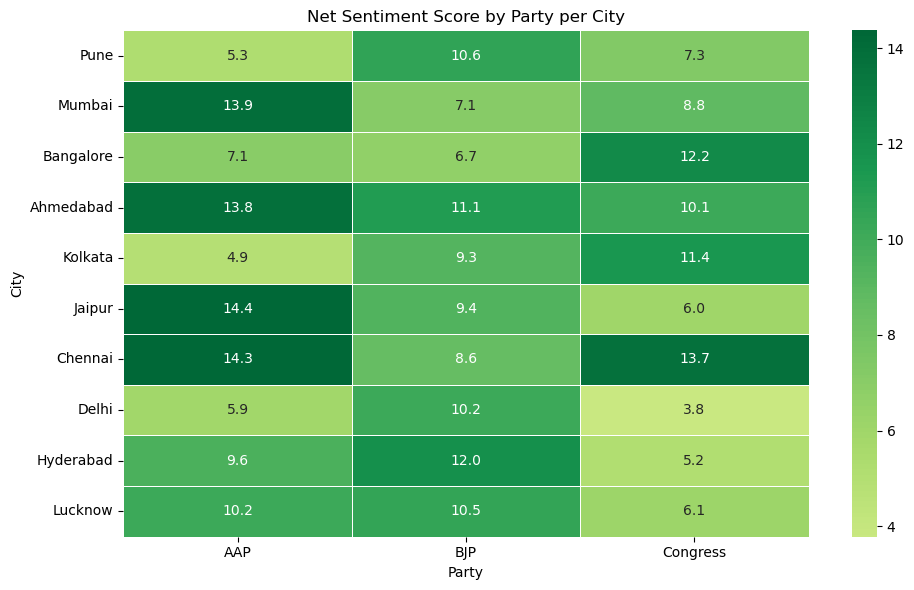

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

# Group by location, party, sentiment
counts = df.groupby(['location', 'party', 'sentiment_label']).size().unstack(fill_value=0)

# Calculate total per location & party
counts['Total'] = counts.sum(axis=1)

# Calculate % positive and negative
counts['Positive %'] = counts['Positive'] / counts['Total'] * 100
counts['Negative %'] = counts['Negative'] / counts['Total'] * 100

# Calculate Net Sentiment Score
counts['Net Score'] = counts['Positive %'] - counts['Negative %']

# Reshape for heatmap: rows = location, columns = party
heatmap_df = counts['Net Score'].unstack().fillna(0)

# Filter top cities by volume (optional: 15 most discussed)
volume = df.groupby(['location', 'party']).size().unstack(fill_value=0).sum(axis=1)
top_cities = volume.sort_values(ascending=False).head(15).index
heatmap_df = heatmap_df.loc[top_cities]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap='RdYlGn', center=0, linewidths=0.5)

plt.title("Net Sentiment Score by Party per City")
plt.xlabel("Party")
plt.ylabel("City")
plt.tight_layout()
plt.show()


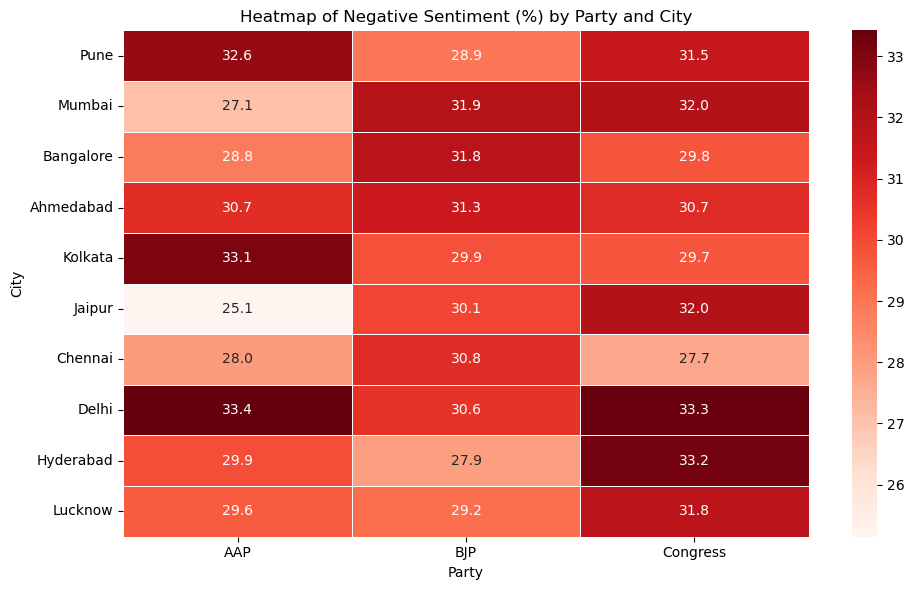

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel data
df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

# Count total posts per city & party
total_counts = df.groupby(['location', 'party']).size().unstack(fill_value=0)

# Count negative posts per city & party
negative_counts = df[df['sentiment_label'] == 'Negative'].groupby(['location', 'party']).size().unstack(fill_value=0)

# Calculate % negative = (neg / total) * 100
negative_percent = (negative_counts / total_counts * 100).fillna(0)

# Filter top 15 most active cities for clarity (optional)
top_cities = total_counts.sum(axis=1).sort_values(ascending=False).head(15).index
heatmap_df = negative_percent.loc[top_cities]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)

plt.title("Heatmap of Negative Sentiment (%) by Party and City")
plt.xlabel("Party")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

# Convert timestamp and extract month
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

# Group total + positive + negative counts
total = df.groupby(['location', 'party', 'month']).size().unstack(fill_value=0)
positive = df[df['sentiment_label'] == 'Positive'].groupby(['location', 'party', 'month']).size().unstack(fill_value=0)
negative = df[df['sentiment_label'] == 'Negative'].groupby(['location', 'party', 'month']).size().unstack(fill_value=0)

# Calculate % positive and negative
pos_pct = (positive / total * 100).fillna(0)
neg_pct = (negative / total * 100).fillna(0)

# Net sentiment score = Positive % - Negative %
net_score = (pos_pct - neg_pct).fillna(0)

# --- FIND SWING CITIES ---
swing_info = []

for (city, party), series in net_score.iterrows():
    score = series.sort_index()
    signs = score.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    if signs.nunique() > 1 and 1 in signs.values and -1 in signs.values:
        swing_info.append((city, party, score.index[0], score.iloc[0], score.index[-1], score.iloc[-1]))

# Build summary DataFrame
swing_df = pd.DataFrame(swing_info, columns=[
    "City", "Party", "Start Month", "Start Score", "End Month", "End Score"
])

# Filter for real swings (direction reversal)
swing_df = swing_df[swing_df['Start Score'] * swing_df['End Score'] < 0]

# Show top swings (optional)
print(swing_df.sort_values(by='Start Score', ascending=False).head(10))


         City     Party Start Month  Start Score End Month  End Score
19    Lucknow  Congress     2024-06    20.000000   2025-06  -2.631579
8       Delhi       AAP     2024-06    16.666667   2025-06  -9.677419
15    Kolkata       AAP     2024-06    16.666667   2025-06 -11.111111
4   Bangalore       BJP     2024-06    15.116279   2025-06  -1.030928
10      Delhi  Congress     2024-06    15.000000   2025-06 -11.538462
3   Bangalore       AAP     2024-06    14.814815   2025-06 -10.526316
12  Hyderabad  Congress     2024-06    14.634146   2025-06  -3.030303
18    Lucknow       BJP     2024-06    -2.247191   2025-06  21.428571
25       Pune  Congress     2024-06    -2.500000   2025-06   8.333333
11  Hyderabad       AAP     2024-06    -3.703704   2025-06  12.000000


In [46]:
import pandas as pd

# Load data
df = pd.read_excel("political sentiment new data.xlsx", engine='openpyxl')

# Convert timestamp and extract month
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

# Total posts per city-party-month
total = df.groupby(['location', 'party', 'month']).size().unstack(fill_value=0)

# Positive and Negative counts
positive = df[df['sentiment_label'] == 'Positive'].groupby(['location', 'party', 'month']).size().unstack(fill_value=0)
negative = df[df['sentiment_label'] == 'Negative'].groupby(['location', 'party', 'month']).size().unstack(fill_value=0)

# Sentiment percentages
pos_pct = (positive / total * 100).fillna(0)
neg_pct = (negative / total * 100).fillna(0)
net_score = (pos_pct - neg_pct).fillna(0)

# Calculate average Net Sentiment per city & party
avg_score = net_score.mean(axis=1).reset_index()
avg_score.columns = ['location', 'party', 'Net Score']

# Top 5 loved and hated cities per party
for party in avg_score['party'].unique():
    print(f"\n🔵 {party} – Most Loved Cities:")
    top5 = avg_score[avg_score['party'] == party].sort_values(by='Net Score', ascending=False).head(5)
    print(top5[['location', 'Net Score']])

    print(f"\n🔴 {party} – Most Hated Cities:")
    bottom5 = avg_score[avg_score['party'] == party].sort_values(by='Net Score', ascending=True).head(5)
    print(bottom5[['location', 'Net Score']])



🔵 AAP – Most Loved Cities:
     location  Net Score
24     Mumbai  14.694320
6     Chennai  13.889876
15     Jaipur  12.941721
0   Ahmedabad  12.167488
12  Hyderabad  11.854637

🔴 AAP – Most Hated Cities:
     location  Net Score
18    Kolkata   4.039761
27       Pune   5.333712
3   Bangalore   7.181658
9       Delhi   7.405166
21    Lucknow  11.296389

🔵 BJP – Most Loved Cities:
     location  Net Score
13  Hyderabad  11.871955
1   Ahmedabad  10.716160
22    Lucknow  10.606711
28       Pune  10.238111
10      Delhi  10.160837

🔴 BJP – Most Hated Cities:
     location  Net Score
4   Bangalore   6.673641
25     Mumbai   7.329382
7     Chennai   8.318246
19    Kolkata   9.263783
16     Jaipur   9.479792

🔵 Congress – Most Loved Cities:
     location  Net Score
8     Chennai  14.193008
5   Bangalore  12.135740
20    Kolkata  11.706011
2   Ahmedabad   9.949393
26     Mumbai   9.160299

🔴 Congress – Most Hated Cities:
     location  Net Score
11      Delhi   4.171679
14  Hyderabad   4.9654